In [6]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
# plt.style.use('seaborn')

In [11]:
d = pd.read_csv('C:/Users/Ankush Negi/Desktop/Video Anomaly Detection in Road Accidents/CSV/Harris.csv',index_col=0)
d.loc[d['Class'] == 1, 'Class'] = -1
d.loc[d['Class'] == 0, 'Class'] = 1
display(d.head())

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,0.095937,0.079875,0.122540,0.116927,0.072448,0.057034,0.112400,0.087920,0.068738,0.223741,...,0.104717,0.048793,0.072264,0.253988,0.150261,0.076213,0.074173,0.072069,0.087121,1
1,0.304889,0.146858,0.330778,0.302426,0.236376,0.166278,0.129041,0.126375,0.096771,0.075723,...,0.096897,0.117096,0.104363,0.106875,0.061867,0.067942,0.097489,0.092374,0.091930,1
2,0.323911,0.284148,0.227685,0.303953,0.333315,0.325163,0.271983,0.205551,0.455989,0.577725,...,0.491290,0.312860,0.203392,0.274094,0.583113,0.433110,0.362074,0.390267,0.349134,1
3,0.322417,0.369392,0.214746,0.184907,0.455699,0.369409,0.349174,0.225891,0.187405,0.216779,...,0.243712,0.062769,0.036116,0.180413,0.152145,0.144760,0.109275,0.133697,0.131372,1
4,0.327992,0.239465,0.372613,0.332271,0.306146,0.274417,0.205956,0.146399,0.352690,0.383255,...,0.248499,0.273326,0.139415,0.159753,0.179938,0.254193,0.266873,0.116151,0.144289,1


In [12]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=2)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)
std=MinMaxScaler()
X_train=std.fit_transform(X_train)
x_test=std.transform(x_test)


C:\Users\Ankush Negi\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [13]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.6)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.5673758865248227
              precision    recall  f1-score   support

          -1       0.70      0.68      0.69       101
           1       0.26      0.28      0.27        40

    accuracy                           0.57       141
   macro avg       0.48      0.48      0.48       141
weighted avg       0.58      0.57      0.57       141



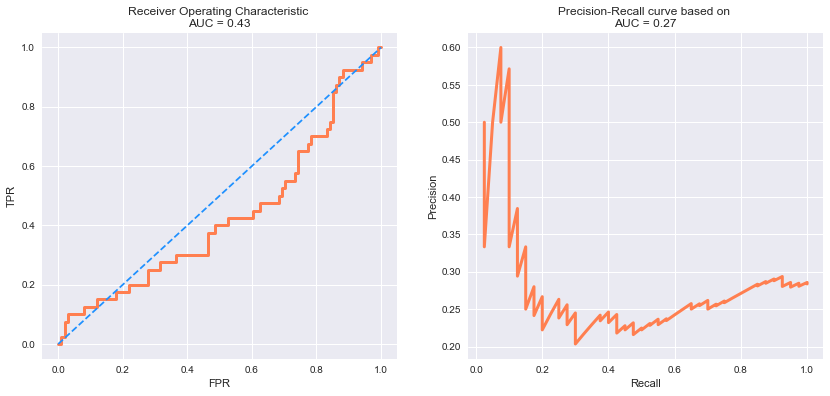

In [14]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()